In [19]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
!ls 

PredicaoBH.ipynb
dados.xlsx
dados_ia.ipynb
data.csv
dtfinal.csv
dtfinal2.csv
dtfinal3.csv
ml
web


In [21]:
dt = pd.read_csv('dtfinal3.csv', sep=";",encoding = 'unicode_escape')

In [22]:
dt.head()

,Endereco,VlrCond,Garagem,Preco,Quarto,M2,Bairro,Cidade,Latitude,Longitude
0,Rua Wenceslau Braz,0,1.0,570000.0,3.0,14.0,Copacabana,Belo Horizonte,-19.830800,-43.988105
1,Rua Abeilard Pereira,0,2.0,435000.0,2.0,15.0,Santa Amalia,Belo Horizonte,-19.844511,-43.981374
2,Avenida do Contorno,1,1.0,497850.0,1.0,15.0,Santa Efigenia,Belo Horizonte,-19.915643,-43.945380
3,Rua Goncalves Dias,0,0.0,320000.0,1.0,17.0,Funcionarios,Belo Horizonte,-19.931185,-43.937641
4,Rua Cristina 1261,0,2.0,394000.0,1.0,17.0,Santo Antonio,Belo Horizonte,-19.947254,-43.935269


In [23]:
dt.dtypes

Endereco      object
VlrCond        int64
Garagem      float64
Preco        float64
Quarto       float64
M2           float64
Bairro        object
Cidade        object
Latitude     float64
Longitude    float64
dtype: object

In [24]:
dt.VlrCond.max()

1500000

In [25]:
dt.Preco.min()

450.0

In [26]:
dt.Quarto.min()

1.0

In [27]:
dt.M2.min()

14.0

In [28]:
#Tratamento Inicial da Base

In [29]:
##CORRIGE IDENTAÇCAO LATITUDE
#dt['Latitude'] = dt['Latitude'].replace({' ','.'},inplace=True)

In [30]:
##CORRIGE IDENTAÇCAO LATITUDE
#dt['Longitude'] = dt['Longitude'].replace({' ','.'},inplace=True)

In [31]:
#dt['Latitude'] = dt['Latitude'].astype('float64')
#dt['Longitude'] = dt['Longitude'].astype('float64')

In [32]:
dt

,Endereco,VlrCond,Garagem,Preco,Quarto,M2,Bairro,Cidade,Latitude,Longitude
0,Rua Wenceslau Braz,0,1.0,570000.0,3.0,14.0,Copacabana,Belo Horizonte,-19.830800,-43.988105
1,Rua Abeilard Pereira,0,2.0,435000.0,2.0,15.0,Santa Amalia,Belo Horizonte,-19.844511,-43.981374
2,Avenida do Contorno,1,1.0,497850.0,1.0,15.0,Santa Efigenia,Belo Horizonte,-19.915643,-43.945380
3,Rua Goncalves Dias,0,0.0,320000.0,1.0,17.0,Funcionarios,Belo Horizonte,-19.931185,-43.937641
4,Rua Cristina 1261,0,2.0,394000.0,1.0,17.0,Santo Antonio,Belo Horizonte,-19.947254,-43.935269
...,...,...,...,...,...,...,...,...,...,...
5907,Avenida Prudente de Morais,0,46.0,24000000.0,1.0,7188.0,Cidade Jardim,Belo Horizonte,-19.947413,-43.948534
5908,Avenida Amazonas 8000,0,0.0,35000000.0,1.0,9420.0,Glalija,Belo Horizonte,-19.937944,-43.999134
5909,Rua Maria Luiza Santiago 200,0,0.0,380000.0,1.0,16153.0,Santa Lucia,Belo Horizonte,-19.974335,-43.949228
5910,Avenida Otacilio Negrao de Lima 01,0,19.0,6500000.0,3.0,1500000.0,Bandeirantes,Belo Horizonte,-19.860980,-43.976840


In [33]:
dt = dt.drop(5911, 0)

In [34]:
dt['Preco'] = dt['Preco'].astype('int32')

In [35]:
dt['Garagem'] = dt['Garagem'].astype('int32')

In [36]:
dt['Quarto'] = dt['Quarto'].astype('int32')

In [37]:
dt['M2'] = dt['M2'].astype('int32')

In [38]:
dt['VlrCond'] = dt['VlrCond'].astype('int32')

In [39]:
dt.dtypes

Endereco      object
VlrCond        int32
Garagem        int32
Preco          int32
Quarto         int32
M2             int32
Bairro        object
Cidade        object
Latitude     float64
Longitude    float64
dtype: object

In [40]:
dt.head()

,Endereco,VlrCond,Garagem,Preco,Quarto,M2,Bairro,Cidade,Latitude,Longitude
0,Rua Wenceslau Braz,0,1,570000,3,14,Copacabana,Belo Horizonte,-19.830800,-43.988105
1,Rua Abeilard Pereira,0,2,435000,2,15,Santa Amalia,Belo Horizonte,-19.844511,-43.981374
2,Avenida do Contorno,1,1,497850,1,15,Santa Efigenia,Belo Horizonte,-19.915643,-43.945380
3,Rua Goncalves Dias,0,0,320000,1,17,Funcionarios,Belo Horizonte,-19.931185,-43.937641
4,Rua Cristina 1261,0,2,394000,1,17,Santo Antonio,Belo Horizonte,-19.947254,-43.935269


In [41]:
# Deixando base em memoria (controle)
dt_bkp = dt

In [42]:
#Removendo linhas com preco menores que 9999 
dt = dt[dt['Preco'] > 9999]

In [43]:
#Comparando tamanho da base antiga
len(dt_bkp)

5911

In [44]:
len(dt)

5828

In [45]:
#Validando remoção das linhas menores que 9999
dt.min()

Endereco     Alameda das Palmeiras 95
VlrCond                             0
Garagem                             0
Preco                           10000
Quarto                              1
M2                                 14
Bairro                      Aeroporto
Cidade                 Belo Horizonte
Latitude                   -20.381093
Longitude                   -46.50754
dtype: object

In [46]:
dt.head()

,Endereco,VlrCond,Garagem,Preco,Quarto,M2,Bairro,Cidade,Latitude,Longitude
0,Rua Wenceslau Braz,0,1,570000,3,14,Copacabana,Belo Horizonte,-19.830800,-43.988105
1,Rua Abeilard Pereira,0,2,435000,2,15,Santa Amalia,Belo Horizonte,-19.844511,-43.981374
2,Avenida do Contorno,1,1,497850,1,15,Santa Efigenia,Belo Horizonte,-19.915643,-43.945380
3,Rua Goncalves Dias,0,0,320000,1,17,Funcionarios,Belo Horizonte,-19.931185,-43.937641
4,Rua Cristina 1261,0,2,394000,1,17,Santo Antonio,Belo Horizonte,-19.947254,-43.935269


In [47]:
#O coeficiente de correlação de Pearson é, em geral, considerado mais forte, assim como premissas mais elevadas sobre os dados.
#  No negativo, considera apenas uma dependência linear completa (adequada a uma linha reta) e em (teoria) requer que as 
#  variáveis sejam normalmente distribuídas. É muito frágil para os outliers (pontos únicos longe da norma).
#
#O coeficiente de correlação de classificação kendall deve ser mais eficiente com conjuntos menores. Ele mede a relação
#  monotônica entre duas variáveis, e é um pouco mais lento para calcular O(n^2). Não exige que as variáveis sejam distribuídas
#  normalmente.
#
#O coeficiente de correlação de spearman também mede a relação monotônica entre duas variáveis. A velocidade é mais rápida O
#  (n log(n)). Muitas vezes dá um valor um pouco maior do que Kendalls. Também não exige que as variáveis sejam distribuídas
#  normalmente.

In [50]:
correlacao =  dt.corr()

In [51]:
correlacao.head()

,VlrCond,Garagem,Preco,Quarto,M2,Latitude,Longitude
VlrCond,1.000000,0.011588,0.004157,0.013021,-0.000621,-0.004167,-0.000795
Garagem,0.011588,1.000000,0.303740,0.337806,0.112719,-0.003290,-0.006940
Preco,0.004157,0.303740,1.000000,0.160150,0.038845,0.012966,0.038568
Quarto,0.013021,0.337806,0.160150,1.000000,0.002710,-0.005175,0.012763
M2,-0.000621,0.112719,0.038845,0.002710,1.000000,0.006413,-0.002416


In [52]:
correlacao2 = dt.corr(method ='kendall')

In [53]:
correlacao2.head()

,VlrCond,Garagem,Preco,Quarto,M2,Latitude,Longitude
VlrCond,1.000000,0.147636,0.201659,0.279748,0.115371,-0.204192,0.080451
Garagem,0.147636,1.000000,0.552609,0.517553,0.482416,-0.101341,0.012737
Preco,0.201659,0.552609,1.000000,0.417518,0.548298,-0.161649,0.119565
Quarto,0.279748,0.517553,0.417518,1.000000,0.525098,-0.084548,0.042091
M2,0.115371,0.482416,0.548298,0.525098,1.000000,-0.070862,0.039359


In [54]:
correlacao3 =  dt.corr(method="spearman")

In [55]:
correlacao3.head()

,VlrCond,Garagem,Preco,Quarto,M2,Latitude,Longitude
VlrCond,1.000000,0.164637,0.236231,0.330558,0.116156,-0.293610,0.117595
Garagem,0.164637,1.000000,0.674319,0.583805,0.580497,-0.136856,0.016290
Preco,0.236231,0.674319,1.000000,0.524174,0.729278,-0.240378,0.177933
Quarto,0.330558,0.583805,0.524174,1.000000,0.611438,-0.116188,0.055513
M2,0.116156,0.580497,0.729278,0.611438,1.000000,-0.103691,0.058894


Text(0.5, 1.0, 'Correlação Pearson')

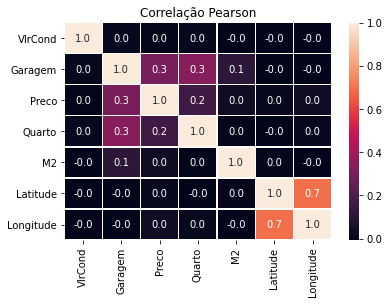

In [56]:
plot = sns.heatmap(correlacao, annot = True, fmt=".1f", linewidths=.4)
plot
plt.title ("Correlação Pearson")

Text(0.5, 1.0, 'Correlação Kendall')

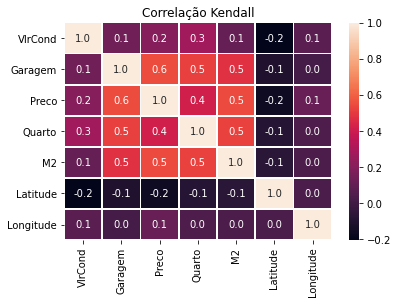

In [57]:
plot = sns.heatmap(correlacao2, annot = True, fmt=".1f", linewidths=.6)
plot
plt.title ("Correlação Kendall")

Text(0.5, 1.0, 'Correlação Spearman')

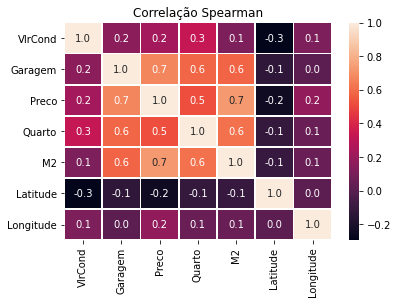

In [58]:
plot = sns.heatmap(correlacao3, annot = True, fmt=".1f", linewidths=.6)
plot
plt.title ("Correlação Spearman")

In [59]:
# !pip install geopandas 

In [60]:
#import geopandas as gpd
#from shapely.geometry import Point, Polygon
#import matplotlib.pyplot as plt

In [61]:
#scatter_plot = plt.scatter(dtlimpo['Longitude'], dtlimpo['Latitude'], alpha=0.5 )
#plt.show()

In [62]:
dt.sort_values('Preco')

,Endereco,VlrCond,Garagem,Preco,Quarto,M2,Bairro,Cidade,Latitude,Longitude
5506,Rua Alvarenga Peixoto,1100,2,10000,4,395,Lourdes,Belo Horizonte,-19.929576,-43.949416
5571,Rua Tome de Souza,0,0,10000,1,420,Savassi,Belo Horizonte,-19.938824,-43.927445
5817,Avenida Dom Pedro II 1492,0,0,11000,1,763,Carlos Prates,Belo Horizonte,-19.913931,-43.953792
5671,Avenida Novara 001,0,8,11000,6,500,Bandeirantes,Belo Horizonte,-19.860257,-43.988034
5611,Rua Martim de Carvalho,0,6,13000,8,441,Santo Agostinho,Belo Horizonte,-19.931173,-43.947941
...,...,...,...,...,...,...,...,...,...,...
5803,Vila da Serra,0,8,13648574,5,718,Nova Lima,Belo Horizonte,-19.980007,-43.941234
5861,Avenida do Contorno 6928,0,5,15000000,1,1100,Lourdes,Belo Horizonte,-19.915643,-43.945380
5907,Avenida Prudente de Morais,0,46,24000000,1,7188,Cidade Jardim,Belo Horizonte,-19.947413,-43.948534
5908,Avenida Amazonas 8000,0,0,35000000,1,9420,Glalija,Belo Horizonte,-19.937944,-43.999134


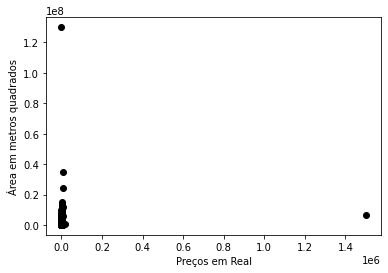

In [63]:
# Pontos do Gráfico na côr Preta (c = 'k')
plt.scatter(dt['M2'], dt['Preco'], c='k')

plt.xlabel("Preços em Real")
plt.ylabel("Área em metros quadrados")

plt.show()

In [64]:
!pip install folium

In [65]:
import folium

In [66]:
mapa = folium.Map(location=[-19.9058278,-44.0005287])
mapa

In [67]:
#Estilos diferentes
folium.Map(
    location=[-19.9058278,-44.0005287],
    tiles='Stamen Toner',
)

In [68]:
folium.Map(
    location=[-19.9058278,-44.0005287],
    tiles='Stamen Terrain',
)

In [69]:
from folium import plugins

In [70]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5828 entries, 0 to 5910
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Endereco   5828 non-null   object 
 1   VlrCond    5828 non-null   int32  
 2   Garagem    5828 non-null   int32  
 3   Preco      5828 non-null   int32  
 4   Quarto     5828 non-null   int32  
 5   M2         5828 non-null   int32  
 6   Bairro     5828 non-null   object 
 7   Cidade     5828 non-null   object 
 8   Latitude   5828 non-null   float64
 9   Longitude  5828 non-null   float64
dtypes: float64(2), int32(5), object(3)
memory usage: 387.0+ KB


In [71]:
#Colocando as coordenadas para a geração do gráfico
coordenadas=[]
for Latitude,Longitude in zip(dt.Latitude.values[:5922],dt.Longitude.values[:5922]):
  coordenadas.append([Latitude,Longitude])

In [72]:
coordenadas

[[-19.8307998, -43.9881048],
 [-19.8445112, -43.9813741],
 [-19.9156428, -43.9453796],
 [-19.9311846, -43.9376407],
 [-19.9472539, -43.9352691],
 [-19.9320955, -43.9393472],
 [-19.8551403, -43.9582535],
 [-19.9311846, -43.9376407],
 [-19.9033345, -43.9719762],
 [-19.9151776, -43.9347647],
 [-19.9261909, -43.93638],
 [-19.9379439, -43.9991336],
 [-19.9379439, -43.9991336],
 [-19.9760471, -43.9703167],
 [-19.9748003, -43.9770588],
 [-19.9469331, -43.9212512],
 [-19.8609803, -43.9768403],
 [-19.9272246, -43.9290919],
 [-19.9364152, -43.9533964],
 [-19.9364152, -43.9533964],
 [-19.9469331, -43.9212512],
 [-19.9760471, -43.9703167],
 [-19.8609803, -43.9768403],
 [-19.9226563, -43.9216125],
 [-19.9226563, -43.9216125],
 [-19.9226563, -43.9216125],
 [-19.9313913, -43.9557993],
 [-19.936584, -43.9421163],
 [-19.936584, -43.9421163],
 [-19.9379439, -43.9991336],
 [-19.9469331, -43.9212512],
 [-19.8320775, -43.9115276],
 [-19.8610549, -43.9507507],
 [-19.8610549, -43.9507507],
 [-19.8610549, -43

In [73]:
# Renderizando o mapa com algumas personalizações:
#mapa = folium.Map(location=[-15.788497,-47.879873],zoom_start=5,tiles='Stamen Toner')
#localização do Senac Rio Preto
#mapa = folium.Map(location=[-20.8149,-49.3773],zoom_start=5,tiles='')




In [74]:
# Adicionando os registros no mapa de calor:
# 1 - Será criado um totalizador por bairro para saber quantidade de imoveis disponiveis
# 2 - Identificação de maior valor para o menor, por latitude x Longitude
#mapa.add_child(plugins.HeatMap(coordenadas))        
mapa

In [75]:
dt['Latitude']

0      -19.830800
1      -19.844511
2      -19.915643
3      -19.931185
4      -19.947254
          ...    
5906   -19.945656
5907   -19.947413
5908   -19.937944
5909   -19.974335
5910   -19.860980
Name: Latitude, Length: 5828, dtype: float64

In [76]:
# # inclusão de marcas nos locais dos imóveis
# for _, Latitude in dt.iterrows():
#     folium.Marker(
#         location=[dt['Latitude'].values, dt['Longitude'].values],
#     ).add_to(mapabh)

# mapabh

In [77]:
# #Início dos estudos
# labels = ['VlrCond', 'Garagem', 'Preco', 'Quarto', 'M2', 'Bairro']

# #men_means = [20, 35, 30, 35, 27]
# #women_means = [25, 32, 34, 20, 25]
# #men_std = [2, 3, 4, 1, 2]
# #women_std = [3, 5, 2, 3, 3]
# width = 0.35       # the width of the bars: can also be len(x) sequence

# fig, ax = plt.subplots()

# ax.bar(labels, dt['VlrCond'], width, yerr=dt['VlrCond'], label='VlrCond')
# #ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
# #       label='Women')

# ax.set_ylabel('Scores')
# ax.set_title('Scores by group and gender')
# ax.legend()

# plt.show()

In [78]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [79]:
dt.dtypes

Endereco      object
VlrCond        int32
Garagem        int32
Preco          int32
Quarto         int32
M2             int32
Bairro        object
Cidade        object
Latitude     float64
Longitude    float64
dtype: object

In [80]:
dt

,Endereco,VlrCond,Garagem,Preco,Quarto,M2,Bairro,Cidade,Latitude,Longitude
0,Rua Wenceslau Braz,0,1,570000,3,14,Copacabana,Belo Horizonte,-19.830800,-43.988105
1,Rua Abeilard Pereira,0,2,435000,2,15,Santa Amalia,Belo Horizonte,-19.844511,-43.981374
2,Avenida do Contorno,1,1,497850,1,15,Santa Efigenia,Belo Horizonte,-19.915643,-43.945380
3,Rua Goncalves Dias,0,0,320000,1,17,Funcionarios,Belo Horizonte,-19.931185,-43.937641
4,Rua Cristina 1261,0,2,394000,1,17,Santo Antonio,Belo Horizonte,-19.947254,-43.935269
...,...,...,...,...,...,...,...,...,...,...
5906,Rua Padre Lopes Cancado,0,0,5600000,1,7000,Camargos,Belo Horizonte,-19.945656,-44.096298
5907,Avenida Prudente de Morais,0,46,24000000,1,7188,Cidade Jardim,Belo Horizonte,-19.947413,-43.948534
5908,Avenida Amazonas 8000,0,0,35000000,1,9420,Glalija,Belo Horizonte,-19.937944,-43.999134
5909,Rua Maria Luiza Santiago 200,0,0,380000,1,16153,Santa Lucia,Belo Horizonte,-19.974335,-43.949228


In [86]:
dt.head()

,Endereco,VlrCond,Garagem,Preco,Quarto,M2,Bairro,Cidade,Latitude,Longitude
0,Rua Wenceslau Braz,0,1,570000,3,14,Copacabana,Belo Horizonte,-19.830800,-43.988105
1,Rua Abeilard Pereira,0,2,435000,2,15,Santa Amalia,Belo Horizonte,-19.844511,-43.981374
2,Avenida do Contorno,1,1,497850,1,15,Santa Efigenia,Belo Horizonte,-19.915643,-43.945380
3,Rua Goncalves Dias,0,0,320000,1,17,Funcionarios,Belo Horizonte,-19.931185,-43.937641
4,Rua Cristina 1261,0,2,394000,1,17,Santo Antonio,Belo Horizonte,-19.947254,-43.935269


In [121]:
from sklearn.preprocessing import OrdinalEncoder

In [120]:
dt_2 = dt.copy()

In [126]:
temp_bairro = pd.get_dummies(dt['Bairro'])

In [127]:
dt_x = dt.drop('Bairro', 1)

In [128]:
dt_x = pd.concat([dt_x, temp_bairro], axis=1)

In [129]:
dt_x.head()

,Endereco,VlrCond,Garagem,Preco,Quarto,M2,Cidade,Latitude,Longitude,Aeroporto,...,Urca,Venda Nova,Vera Cruz,Vila Cloris,Vila Oeste,Vila Paris,Visconde do Rio Branco,Vista Alegre,Vitoria,Xodo Marize
0,Rua Wenceslau Braz,0,1,570000,3,14,Belo Horizonte,-19.830800,-43.988105,0,...,0,0,0,0,0,0,0,0,0,0
1,Rua Abeilard Pereira,0,2,435000,2,15,Belo Horizonte,-19.844511,-43.981374,0,...,0,0,0,0,0,0,0,0,0,0
2,Avenida do Contorno,1,1,497850,1,15,Belo Horizonte,-19.915643,-43.945380,0,...,0,0,0,0,0,0,0,0,0,0
3,Rua Goncalves Dias,0,0,320000,1,17,Belo Horizonte,-19.931185,-43.937641,0,...,0,0,0,0,0,0,0,0,0,0
4,Rua Cristina 1261,0,2,394000,1,17,Belo Horizonte,-19.947254,-43.935269,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
y = dt['Preco']
x = dt_x

In [132]:
x = x.drop('Endereco', 1)

In [133]:
x = x.drop('Cidade', 1)

In [134]:
x = x.drop('Latitude', 1)

In [135]:
x = x.drop('Longitude', 1)

In [136]:
x

,VlrCond,Garagem,Preco,Quarto,M2,Aeroporto,Alipio de Melo,Alto Barroca,Alto dos Caicaras,Alto dos Pinheiros,...,Urca,Venda Nova,Vera Cruz,Vila Cloris,Vila Oeste,Vila Paris,Visconde do Rio Branco,Vista Alegre,Vitoria,Xodo Marize
0,0,1,570000,3,14,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,435000,2,15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,497850,1,15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,320000,1,17,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,394000,1,17,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5906,0,0,5600000,1,7000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5907,0,46,24000000,1,7188,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5908,0,0,35000000,1,9420,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5909,0,0,380000,1,16153,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
x_bkp = x

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.3, random_state = 2 )

In [141]:
linreg = LinearRegression()

In [142]:
linreg.fit(x, y)

LinearRegression()

In [143]:
y_pred = linreg.predict(x)

In [145]:
plt.figure(figsize = (10, 5))

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

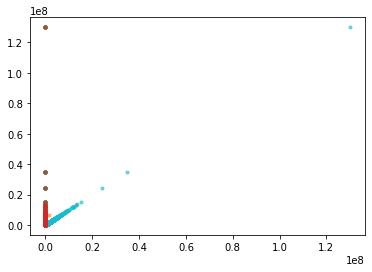

In [146]:
plt.plot(x, y, '.', alpha = 0.1)
plt.plot(x, y_pred, '.', alpha = 0.5)
plt.show()

In [149]:
x = dt_x.linspace(-10, 10, 1000)
y = dt_x.exp(x)/(1+dt_x.exp(x))

plt.figure(figsize = (10, 3), dpi = 100)

plt.plot(x, y, '.', alpha = 0.15)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'linspace'